In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import numpy as np
import copy
import hashlib
import json
import warnings
import calendar
import datetime
warnings.filterwarnings('ignore')
import pycountry_convert as cc

%matplotlib inline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, \
                            roc_auc_score, roc_curve

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    GradientBoostingClassifier,
    GradientBoostingRegressor,
)
from sklearn.metrics import mean_squared_error
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor,
)
from math import log2

from utils.utils import process_categorical_features

#from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


In [2]:
df = pd.read_csv(os.path.join('data', 'train.csv')) 
df1=df.copy()
df1.info()
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338487 entries, 0 to 338486
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                338487 non-null  int64  
 1   user_address                      338487 non-null  object 
 2   user_balance_usd                  338487 non-null  float64
 3   user_balance_coin_a               338487 non-null  float64
 4   user_historical_transactions_10s  338487 non-null  int64  
 5   user_historical_transactions_30s  338487 non-null  int64  
 6   exchange_a_price                  309845 non-null  float64
 7   exchange_b_price                  338487 non-null  float64
 8   exchange_a_volatility             323277 non-null  object 
 9   exchange_b_volatility             330565 non-null  float64
 10  anonymous                         338487 non-null  object 
 11  result                            338487 non-null  i

,id,user_address,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_a_volatility,exchange_b_volatility,anonymous,result
0,8,0x930B,84139.092267,44.193560,0,0,66.742521,66.8325,very high,0.000367,A113,0
1,12,0x5779,34609.449276,331.501171,0,0,41.429574,41.5401,low,0.000695,M958,0
2,28,0x5779,30598.783296,1581.902691,0,0,35.817631,35.8701,very low,0.000431,F255,0
3,50,0x5779,20992.680359,1260.406181,0,0,47.711827,47.8233,low,0.000456,F2332,0
4,56,0xD47A,120838.946555,180.090128,0,0,52.812842,52.6869,low,NaN,A198,0
...,...,...,...,...,...,...,...,...,...,...,...,...
338482,3988947,0x5779,29374.263175,352.561329,0,0,46.680615,46.6683,medium,0.000435,M142,0
338483,3988948,0x5AEe,50847.577759,239.577796,0,0,72.139667,360.4125,low,0.000452,A131,0
338484,3988961,0x930B,121303.381921,160.222687,0,0,52.285416,52.3887,low,0.000285,A2158,0
338485,3988964,0x5779,18515.028195,1927.485662,0,0,38.559282,38.6211,very low,0.000185,F1831,0


In [3]:
df.corr()

,id,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_b_volatility,result
id,1.000000,-0.000087,-0.000542,0.002663,0.002178,0.000967,-0.000016,0.002983,0.000897
user_balance_usd,-0.000087,1.000000,-0.587663,-0.031081,-0.048926,0.213988,0.080039,-0.085369,-0.018770
user_balance_coin_a,-0.000542,-0.587663,1.000000,0.018207,0.027556,-0.314347,-0.116180,0.035495,0.017267
user_historical_transactions_10s,0.002663,-0.031081,0.018207,1.000000,0.526806,0.034195,0.012404,0.155497,0.354665
user_historical_transactions_30s,0.002178,-0.048926,0.027556,0.526806,1.000000,0.085027,0.035226,0.242663,0.421841
exchange_a_price,0.000967,0.213988,-0.314347,0.034195,0.085027,1.000000,0.371172,0.038767,0.089232
exchange_b_price,-0.000016,0.080039,-0.116180,0.012404,0.035226,0.371172,1.000000,0.018454,0.036113
exchange_b_volatility,0.002983,-0.085369,0.035495,0.155497,0.242663,0.038767,0.018454,1.000000,0.198650
result,0.000897,-0.018770,0.017267,0.354665,0.421841,0.089232,0.036113,0.198650,1.000000


In [4]:
df.user_historical_transactions_30s.unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [5]:
def meds (df):

    cats = ['very low', 'low', 'medium', 'high','very high']
    dic ={}
    for s in cats :
        dic[s]=0
        med = df.exchange_b_volatility[ df['exchange_a_volatility'] == s].median()
        dic[s]=med
    avg =df.exchange_b_volatility[ df['exchange_a_volatility']!='Null'].median()
    
    return dic, avg
dic , avg =meds(df)
avg

0.0003749147902259

In [6]:
df2= df.copy()
l=[]
for s in dic :
    l.append(dic[s])
    
l

def mapt(x,l):
    
    x=min(l, key=lambda n:abs(n-x))
    return 'low'
    if(x==l[0]):
        return 'very low'
    elif(x==l[2]):
        return 'medium'
    elif(x==l[3]):
        return 'high'
    elif(x==l[4]):
        return 'very high'
    elif(x==l[1]):
        return 'low'
    else:
        return 'low'
        
#df2['exchange_b_volatility'] = df2['exchange_b_volatility'].map(lambda x:mapt(x,l))

df2

,id,user_address,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_a_volatility,exchange_b_volatility,anonymous,result
0,8,0x930B,84139.092267,44.193560,0,0,66.742521,66.8325,very high,0.000367,A113,0
1,12,0x5779,34609.449276,331.501171,0,0,41.429574,41.5401,low,0.000695,M958,0
2,28,0x5779,30598.783296,1581.902691,0,0,35.817631,35.8701,very low,0.000431,F255,0
3,50,0x5779,20992.680359,1260.406181,0,0,47.711827,47.8233,low,0.000456,F2332,0
4,56,0xD47A,120838.946555,180.090128,0,0,52.812842,52.6869,low,NaN,A198,0
...,...,...,...,...,...,...,...,...,...,...,...,...
338482,3988947,0x5779,29374.263175,352.561329,0,0,46.680615,46.6683,medium,0.000435,M142,0
338483,3988948,0x5AEe,50847.577759,239.577796,0,0,72.139667,360.4125,low,0.000452,A131,0
338484,3988961,0x930B,121303.381921,160.222687,0,0,52.285416,52.3887,low,0.000285,A2158,0
338485,3988964,0x5779,18515.028195,1927.485662,0,0,38.559282,38.6211,very low,0.000185,F1831,0


In [7]:
def clean_data (df):
    df1 = df.copy()
    
    
    
    df1['anonymousL'] = df1.anonymous.str.replace('\d+','')
    df1['anonymousN'] =df1.anonymous.str.replace('[aA-zZ]+','')   
    df1['anonymousN']=df1['anonymousN'].astype('int64')
    df1['anonymousL']=df1['anonymousL'].astype('category')
    
   
    df1['exchange_a_volatility']=df1['exchange_a_volatility'].astype('category')

    

    
    #delete if needed
    df1['exchange_a_volatility'] = df1['exchange_a_volatility'].fillna('low')
    df1['exchange_b_volatility'] = df1['exchange_b_volatility'].fillna(avg)
    
 
    df1['exchange_b_price'] = df1['exchange_b_price'].fillna(df.exchange_a_price)
    df1['exchange_a_price'] = df1['exchange_a_price'].fillna(df.exchange_b_price)

    ordered_cats = ['very low', 'low', 'medium', 'high','very high']
    df1 = df1.assign(exchange_a_volatility=df1['exchange_a_volatility'].cat.set_categories(ordered_cats, ordered=True))
    #df1 = df1.assign(exchange_b_volatility=df1['exchange_b_volatility'].cat.set_categories(ordered_cats, ordered=True))

    
    df1['profit'] = abs(df1.exchange_b_price - df1.exchange_a_price)
    df1['balance_a_usd']= df1.user_balance_coin_a * df1.exchange_a_price
    df1['percentage_coin']= df1.balance_a_usd/df1.user_balance_usd
    
    df1=df1.dropna()
    robustscaler = RobustScaler()
    prof = df1[['profit']]
    robustscaler.fit(prof)
    df1['profit'] = robustscaler.transform(prof)
    
   ##here
    bal_a = df1[['balance_a_usd']]
    robustscaler.fit(bal_a)
    df1['balance_a_usd'] = robustscaler.transform(bal_a)
    
    bal_c = df1[['user_balance_coin_a']]
    robustscaler.fit(bal_c)
    df1['user_balance_coin_a'] = robustscaler.transform(bal_c)
        
    bal_u = df1[['user_balance_usd']]
    robustscaler.fit(bal_u)
    df1['user_balance_usd'] = robustscaler.transform(bal_u)
    
    per = df1[['percentage_coin']]
    robustscaler.fit(per)
    df1['percentage_coin'] = robustscaler.transform(per)
    
    normalizer = Normalizer(norm='l2')
    # save numerical columns to normalize
    X = df1[['exchange_a_price', 'exchange_b_price','exchange_b_volatility']]

    # fit transformer to data
    normalizer.fit(X)
    X_normalized = normalizer.transform(X)
    df1['exchange_a_price'] = X_normalized[:, 0]
    df1['exchange_b_price'] = X_normalized[:, 1]
    df1['exchange_b_volatility'] = X_normalized[:, 2]
    #df1['exchange_b_volatility'] = X_normalized[:, 3]
    
   

    #nothing new 
    df_ = df1[['user_balance_usd', 'user_balance_coin_a', 'user_historical_transactions_10s', 'user_historical_transactions_30s', 'exchange_a_price', 'exchange_b_price' , 'exchange_a_volatility','exchange_b_volatility','result','profit','anonymousL']].copy()


    return df_

In [8]:
df_clean = clean_data(df2)
df_clean

,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_a_volatility,exchange_b_volatility,result,profit,anonymousL
0,0.598907,-0.608307,0,0,0.706630,0.707583,very high,0.000004,0,0.022358,A
1,-0.714588,-0.064016,0,0,0.706164,0.708048,low,0.000012,0,0.193718,M
2,-0.820948,2.304812,0,0,0.706589,0.707624,very low,0.000009,0,-0.290471,F
3,-1.075696,1.695752,0,0,0.706281,0.707931,low,0.000007,0,0.201621,F
4,1.572164,-0.350857,0,0,0.707950,0.706262,low,0.000005,0,0.322292,A
...,...,...,...,...,...,...,...,...,...,...,...
338482,-0.853421,-0.024119,0,0,0.707200,0.707013,medium,0.000007,0,-0.625356,M
338483,-0.283963,-0.238161,0,0,0.196266,0.980551,low,0.000001,0,2403.467346,A
338484,1.584480,-0.388495,0,0,0.706409,0.707804,low,0.000004,0,0.133320,A
338485,-1.141401,2.959503,0,0,0.706540,0.707673,very low,0.000003,0,-0.212501,F


In [36]:
'''# from imblearn.over_sampling import SMOTE
df_tree= df_clean.copy()
X = df_tree.drop('result',axis=1)
y = df_tree['result']
X_ = process_categorical_features(X)


X_train, X_test, y_train, y_test = train_test_split(
        X_, y, random_state=42, test_size=0.20)  
'''
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler

df_tree= df_clean.copy()
X = df_tree.drop('result',axis=1)
y = df_tree['result']


#rus_sampler = RandomUnderSampler(sampling_strategy=.5, random_state=42)
#X_under, y_under = rus_sampler.fit_resample(X, y)

ros_sampler = RandomOverSampler(sampling_strategy=.5, random_state=42)
X_over, y_over = ros_sampler.fit_resample(X, y)

df_tree = pd.DataFrame(X_over).copy()

df_tree['result'] = y_over

X = df_tree.drop('result',axis=1)
y = df_tree['result']
X_ = process_categorical_features(X)


X_train, X_test, y_train, y_test = train_test_split(
        X_, y, random_state=42, test_size=0.20)  


In [78]:
#clf = RandomForestClassifier(criterion = 'gini', n_estimators=80 ,max_depth =25,random_state=42)
#log_loss , entropy,gini
clf = RandomForestClassifier(criterion = 'entropy', n_estimators=300 ,max_depth =20,random_state=42, min_samples_leaf =20, max_features='log2',n_jobs = -1)

#0.938


In [79]:
clf.fit(X_train,y_train)

predicted_proba= clf.predict_proba(X_test)
y_pred =clf.predict(X_test)

roc_auc = roc_auc_score(y_score=predicted_proba[:,1], y_true= y_test)
   
#confmat = confusion_matrix(y_true=y_test, y_pred=x1)
print('The AUROC of our classifier is = %.3f' % roc_auc)

#feature_importances = pd.Series(data=clf.feature_importances_, index=X_.columns)
#feature_importances.sort_values(ascending=False)




The AUROC of our classifier is = 0.944


In [80]:
feature_importances = pd.Series(data=clf.feature_importances_, index=X_.columns)
feature_importances.sort_values(ascending=False)
#0.886

user_historical_transactions_30s    0.269644
profit                              0.116277
user_balance_coin_a                 0.103028
exchange_b_price                    0.100351
exchange_a_price                    0.099039
user_balance_usd                    0.093779
user_historical_transactions_10s    0.073628
anonymousL_A                        0.042285
exchange_b_volatility               0.037593
anonymousL_F                        0.025705
exchange_a_volatility_low           0.011177
anonymousL_M                        0.010626
exchange_a_volatility_medium        0.006946
exchange_a_volatility_very low      0.004661
exchange_a_volatility_very high     0.003034
exchange_a_volatility_high          0.002226
dtype: float64

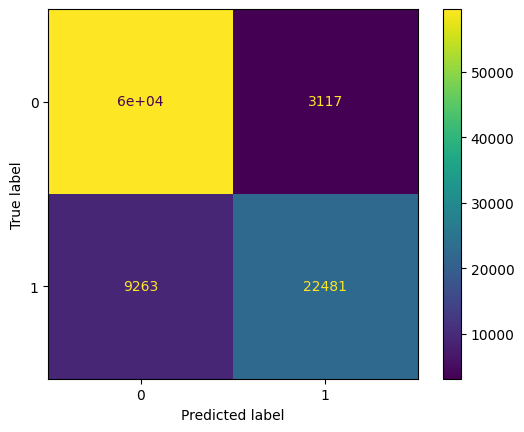

In [81]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [82]:
df_t = pd.read_csv('data/test.csv', index_col='id')
df_t

,user_address,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_a_volatility,exchange_b_volatility,anonymous
id,,,,,,,,,,
3988978,0x5779,51391.615731,1060.556537,0,0,35.954570,35.9667,NaN,NaN,F142
3988979,0x5779,91986.384059,218.535933,1,4,45.300626,45.0849,very high,0.000781,M1729
3989002,0x5779,41759.237681,1285.867013,0,0,37.481412,37.5039,very low,0.000562,F1542
3989008,0x5779,48074.340099,0.535869,0,0,40.753761,40.8303,low,0.000372,M1550
3989022,0x5AEe,36021.119553,431.542705,0,0,70.976657,282.6852,low,0.000576,A638
...,...,...,...,...,...,...,...,...,...,...
5307776,0x5779,80592.884173,0.706920,0,0,39.991680,39.7971,very low,0.000707,F132
5307781,0xD47A,107779.088520,423.156478,0,0,54.280719,54.2535,low,NaN,A16
5307790,0x5779,118584.595142,110.042328,0,0,71.513852,71.4693,low,0.000264,A549


In [83]:
df2= df_t.copy()
l=[]
for s in dic :
    l.append(dic[s])
    
l

def mapt(x,l):
    
    x=min(l, key=lambda n:abs(n-x))
 
    if(x==l[0]):
        return 'very low'
    elif(x==l[2]):
        return 'medium'
    elif(x==l[3]):
        return 'high'
    elif(x==l[4]):
        return 'very high'
    elif(x==l[1]):
        return 'low'
    else:
        return 'low'
        
#df2['exchange_b_volatility'] = df2['exchange_b_volatility'].map(lambda x:mapt(x,l))

def clean_test (df):
    df1 = df.copy()
    dic ,avg = meds(df1)
    
    
    df1['anonymousL'] = df1.anonymous.str.replace('\d+','')
    df1['anonymousN'] =df1.anonymous.str.replace('[aA-zZ]+','')   
    df1['anonymousN']=df1['anonymousN'].astype('int64')
    df1['anonymousL']=df1['anonymousL'].astype('category')
    
    #df2['exchange_b_volatility'] = df2['exchange_b_volatility'].map(lambda x:mapt(x,l))
    
    #df1['exchange_b_volatility']=df1['exchange_b_volatility'].astype('category')
    df1['exchange_a_volatility']=df1['exchange_a_volatility'].astype('category')

    

    
    df1['exchange_a_price'] = df1['exchange_a_price'].fillna(df.exchange_b_price)
    df1['exchange_b_price'] = df1['exchange_b_price'].fillna(df.exchange_a_price)
    
    
    
    
    #delete if needed
    df1['exchange_a_volatility'] = df1['exchange_a_volatility'].fillna('low')
    df1['exchange_b_volatility'] = df1['exchange_b_volatility'].fillna(avg)
    
    
    ordered_cats = ['very low', 'low', 'medium', 'high','very high']
    df1 = df1.assign(exchange_a_volatility=df1['exchange_a_volatility'].cat.set_categories(ordered_cats, ordered=True))
    #df1 = df1.assign(exchange_b_volatility=df1['exchange_b_volatility'].cat.set_categories(ordered_cats, ordered=True))

    
    df1['profit'] = abs(df1.exchange_b_price - df1.exchange_a_price)
    df1['balance_a_usd']= df1.user_balance_coin_a * df1.exchange_a_price
    df1['percentage_coin']= df1.balance_a_usd/df1.user_balance_usd
    
    df1=df1.dropna()
    
    robustscaler = RobustScaler()
    prof = df1[['profit']]
    robustscaler.fit(prof)
    df1['profit'] = robustscaler.transform(prof)
    
   ##here
    bal_a = df1[['balance_a_usd']]
    robustscaler.fit(bal_a)
    df1['balance_a_usd'] = robustscaler.transform(bal_a)
    
    bal_c = df1[['user_balance_coin_a']]
    robustscaler.fit(bal_c)
    df1['user_balance_coin_a'] = robustscaler.transform(bal_c)
        
    bal_u = df1[['user_balance_usd']]
    robustscaler.fit(bal_u)
    df1['user_balance_usd'] = robustscaler.transform(bal_u)
    
    per = df1[['percentage_coin']]
    robustscaler.fit(per)
    df1['percentage_coin'] = robustscaler.transform(per)
    
    normalizer = Normalizer(norm='l2')
    # save numerical columns to normalize
    X = df1[['exchange_a_price', 'exchange_b_price','exchange_b_volatility']]

    # fit transformer to data
    normalizer.fit(X)
    X_normalized = normalizer.transform(X)
    df1['exchange_a_price'] = X_normalized[:, 0]
    df1['exchange_b_price'] = X_normalized[:, 1]
    df1['exchange_b_volatility'] = X_normalized[:, 2]
    #df1['exchange_b_volatility'] = X_normalized[:, 3]
    
   

    #nothing new 
    df_ = df1[['user_balance_usd', 'user_balance_coin_a', 'user_historical_transactions_10s', 'user_historical_transactions_30s', 'exchange_a_price', 'exchange_b_price' , 'exchange_a_volatility','exchange_b_volatility','profit','anonymousL']].copy()


    return df_

In [84]:
df_t_clean = clean_test(df2)

In [85]:
df_t_clean

,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_a_volatility,exchange_b_volatility,profit,anonymousL
id,,,,,,,,,,
3988978,-0.270034,1.300986,0,0,0.706988,0.707226,low,0.000007,-0.634007,F
3988979,0.806417,-0.276910,1,4,0.708792,0.705417,very high,0.000012,1.075565,M
3989002,-0.525456,1.723204,0,0,0.706895,0.707319,very low,0.000011,-0.547035,F
3989008,-0.357998,-0.685429,0,0,0.706443,0.707770,low,0.000006,-0.093177,M
3989022,-0.677614,0.122251,0,0,0.243522,0.969895,low,0.000002,1776.960014,A
...,...,...,...,...,...,...,...,...,...,...
5307776,0.504295,-0.685109,0,0,0.708829,0.705380,very low,0.000013,0.898003,F
5307781,1.225192,0.106536,0,0,0.707284,0.706929,low,0.000005,-0.507306,A
5307790,1.511721,-0.480221,0,0,0.707327,0.706886,low,0.000003,-0.361765,A


In [86]:
test_=process_categorical_features(df_t_clean)


#clf.fit(X_train,y_train)

#predicted_proba= clf.predict_proba(df_t_clean)

test_=process_categorical_features(df_t_clean)

y_pred_proba = clf.predict_proba(test_)

#df_f = pd.DataFrame(y_pred_proba)
#df_f.to_csv(r'PleaseBeGood2.csv',index=True)

predicted_proba = y_pred_proba
res = pd.DataFrame(index=test_.index, data= y_pred_proba[:,1])
res['result'] = res[0]
res = res.drop(0, axis=1)

res.to_csv(r'PleaseBeGood21.csv', index = True)

In [87]:
len(predicted_proba)

94484

In [88]:
test_=process_categorical_features(df_t_clean)

predicted_proba = clf.predict_proba(test_)
res = pd.DataFrame(index=test_.index, data=predicted_proba[:,1])
res['result'] = res[0]
res = res.drop(0, axis=1)

res.to_csv(r'PleaseBeGood3.csv', index = True)
''''''

''